# Exploratory Data Analysis With R Programming Language.

The Obesity Dataset (ObesityData.csv) by Palechor & de la Hoz Manotas (2019) for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico includes the following variables: <br/>
Gender, Age, Height, Weight, Family history with overweight, Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals
(NCP), Consumption of food between meals (CAEC), onsumption of water daily (CH2O), Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Consumption of alcohol (CALC) and Transportation used (MTRANS). <br/>

# 1. Read the given dataset (ObesityData.csv) into R.

In [1]:
df <- read.csv("https://raw.githubusercontent.com/RifatMuhtasim/R_Programming_Language/main/data/ObesityData.csv")
head(df)
dim(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile


[1] 2111   16

**Import Dataset on Local Machine:**


```
df <- read.csv("ObesityData.csv")
head(df)
```



# 2. Exploring Categorical Variables
- Calculate frequencies, percentages and cumulative frequencies of all the categorical variables.


In [2]:
# Extract only the categorical variables from the dataset
cat_df <- df[sapply(df, is.factor) | sapply(df, is.character)]
head(cat_df)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Female,yes,no,Sometimes,no,no,no,Public_Transportation
2,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
3,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
4,Male,no,no,Sometimes,no,no,Frequently,Walking
5,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation
6,Male,no,yes,Sometimes,no,no,Sometimes,Automobile


In [3]:
# Calculate Frequency, Percentage and Cumulative Frequency

for (c in names(cat_df)){
  tab <- table(cat_df[[c]])
  cat("Variable:", c, "\n")
  print(cbind(freq=tab, prec= prop.table(tab) * 100, cumfreq=cumsum(tab)))
  cat("\n")
}

Variable: Gender 
       freq     prec cumfreq
Female 1043 49.40786    1043
Male   1068 50.59214    2111

Variable: family_history_with_overweight 
    freq    prec cumfreq
no   385 18.2378     385
yes 1726 81.7622    2111

Variable: FAVC 
    freq     prec cumfreq
no   245 11.60587     245
yes 1866 88.39413    2111

Variable: CAEC 
           freq      prec cumfreq
Always       53  2.510658      53
Frequently  242 11.463761     295
no           51  2.415917     346
Sometimes  1765 83.609664    2111

Variable: SMOKE 
    freq     prec cumfreq
no  2067 97.91568    2067
yes   44  2.08432    2111

Variable: SCC 
    freq      prec cumfreq
no  2015 95.452392    2015
yes   96  4.547608    2111

Variable: CALC 
           freq        prec cumfreq
Always        1  0.04737091       1
Frequently   70  3.31596400      71
no          639 30.27001421     710
Sometimes  1401 66.36665088    2111

Variable: MTRANS 
                      freq       prec cumfreq
Automobile             457 21.6485078   

# 3. Present the categorical variables using suitable graph
- Present the categorical variables using suitable graph (e.g., horizontal and vertical bar diagram, pie chart, etc.) <br/>


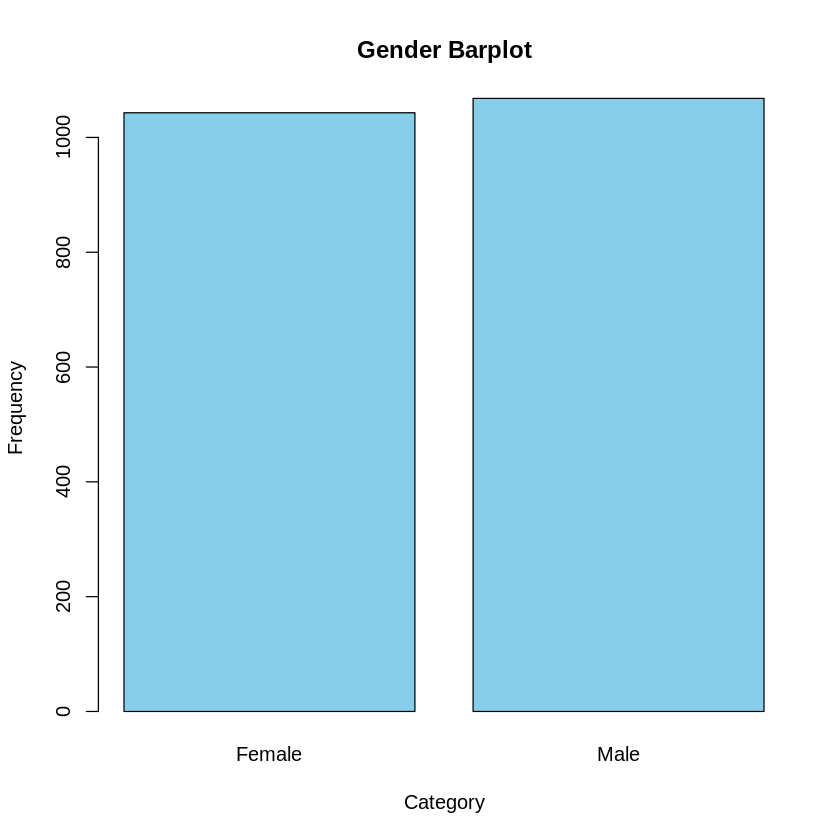

In [4]:
# Vertical Barplot for Gender categorical variable.
barplot(table(cat_df['Gender']), main="Gender Barplot", xlab="Category", ylab = "Frequency", col="skyblue")

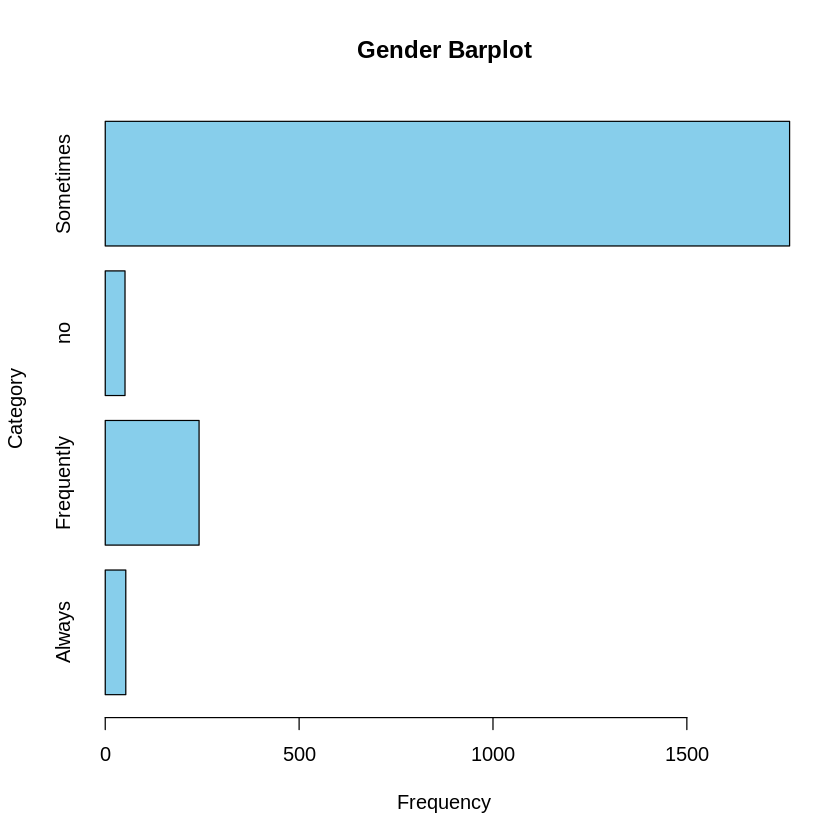

In [5]:
# Horizontal Barplots for CAEC (Consumption of food between meals) Categorical Variable
barplot(table(cat_df['CAEC']), horiz = TRUE, main="Gender Barplot", ylab="Category", xlab = "Frequency", col="skyblue")

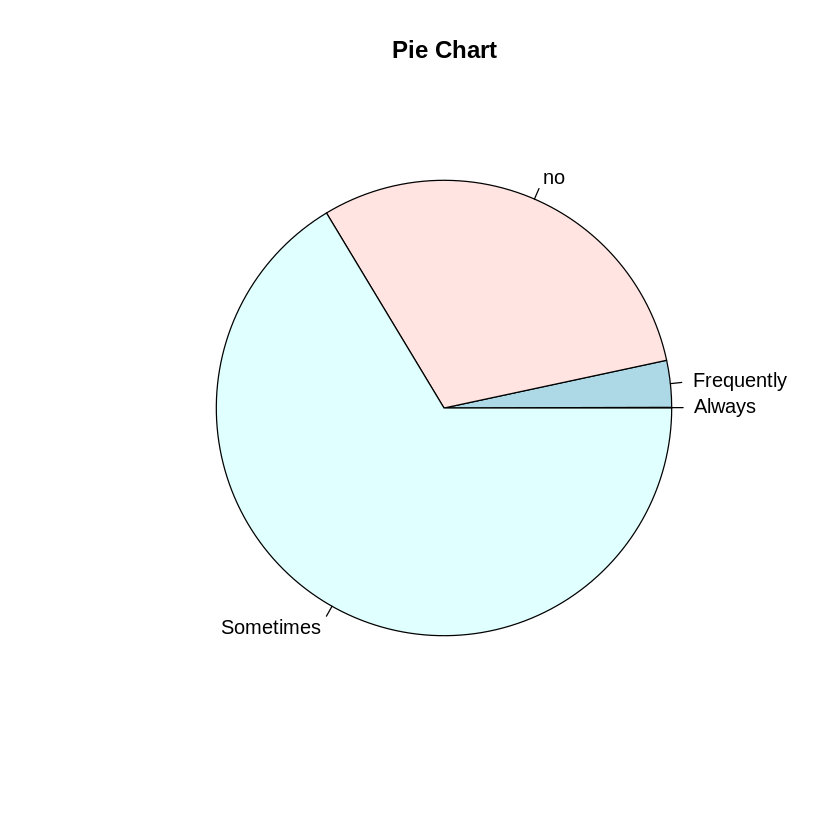

In [6]:
# Pie Chart for CALC (Consumption of alcohol) Variable.
pie(table(cat_df['CALC']), main="Pie Chart")

Using For Loop Like:


```
for (c in names(cat_df)){
  barplot(table(cat_df[[c]]), main=c, xlab="Category", ylab="Frequency", col=rainbow(length(unique(cat_df[[c]]))))
}
```



# 4. Calculate summary statistics for Numerical Variable
- Calculate appropriate summary statistics for Numerical Variable (e.g., minimum, maximum, mean, median, mode, 1st quartile, 3rd quartile, standard deviation, variance, coefficient of variation, interquartile range, coefficient of quartile deviation, etc.) for each of the numerical variables.


In [7]:
# Extract only the numerical variables from the dataset and rename to 'num'
num_df <- df[sapply(df, is.numeric)]
head(num_df)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,1.62,64.0,2,3,2,0,1
2,21,1.52,56.0,3,3,3,3,0
3,23,1.80,77.0,2,3,2,2,1
4,27,1.80,87.0,3,3,2,2,0
5,22,1.78,89.8,2,1,2,0,0
6,29,1.62,53.0,2,3,2,0,0


In [8]:
# Calculate summary statistics for each numerical variable
summary <- lapply(num_df, function(x) {
  c(
    mean = mean(x, na.rm = TRUE),
    median = median(x, na.rm = TRUE),
    mode = as.numeric(names(sort(table(x), decreasing = TRUE)[1])),
    min = min(x, na.rm = TRUE),
    max = max(x, na.rm = TRUE),
    q1 = quantile(x, 0.25, na.rm = TRUE),
    q3 = quantile(x, 0.75, na.rm = TRUE),
    sd = sd(x, na.rm = TRUE),
    var = var(x, na.rm = TRUE),
    cv = sd(x, na.rm = TRUE) / mean(x, na.rm = TRUE) * 100,
    iqr = IQR(x, na.rm = TRUE),
    cqd = IQR(x, na.rm = TRUE) / (quantile(x, 0.75, na.rm = TRUE) + quantile(x, 0.25, na.rm = TRUE))
  )
})


In [9]:
# Convert the result to a data frame
summary_df <- as.data.frame(do.call(rbind, summary))

# Display the summary statistics
summary_df

,mean,median,mode,min,max,q1.25%,q3.75%,sd,var,cv,iqr,cqd.75%
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,24.3125999,22.777890,18.0,14.00,61.00,19.947192,26.000000,6.34596827,4.027131e+01,26.101562,6.0528080,0.13173401
Height,1.7016774,1.700499,1.7,1.45,1.98,1.630000,1.768464,0.09330482,8.705789e-03,5.483109,0.1384640,0.04074311
Weight,86.5860581,83.000000,80.0,39.00,173.00,65.473343,107.430682,26.19117175,6.859775e+02,30.248717,41.9573390,0.24266259
FCVC,2.4190431,2.385502,3.0,1.00,3.00,2.000000,3.000000,0.53392658,2.850776e-01,22.071810,1.0000000,0.20000000
NCP,2.6856280,3.000000,3.0,1.00,4.00,2.658738,3.000000,0.77803865,6.053441e-01,28.970454,0.3412620,0.06030709
CH2O,2.0080114,2.000000,2.0,1.00,3.00,1.584812,2.477420,0.61295345,3.757119e-01,30.525397,0.8926075,0.21973324
FAF,1.0102977,1.000000,0.0,0.00,3.00,0.124505,1.666678,0.85059243,7.235075e-01,84.192257,1.5421725,0.86098011
TUE,0.6578659,0.625350,0.0,0.00,2.00,0.000000,1.000000,0.60892726,3.707924e-01,92.560997,1.0000000,1.00000000


# 5. Present the numerical variables with graph
- Present the numerical variables using suitable graph (e.g., histogram, frequency curve, histogram with normal probability curve, box plot, stem and leaf plot, etc.).

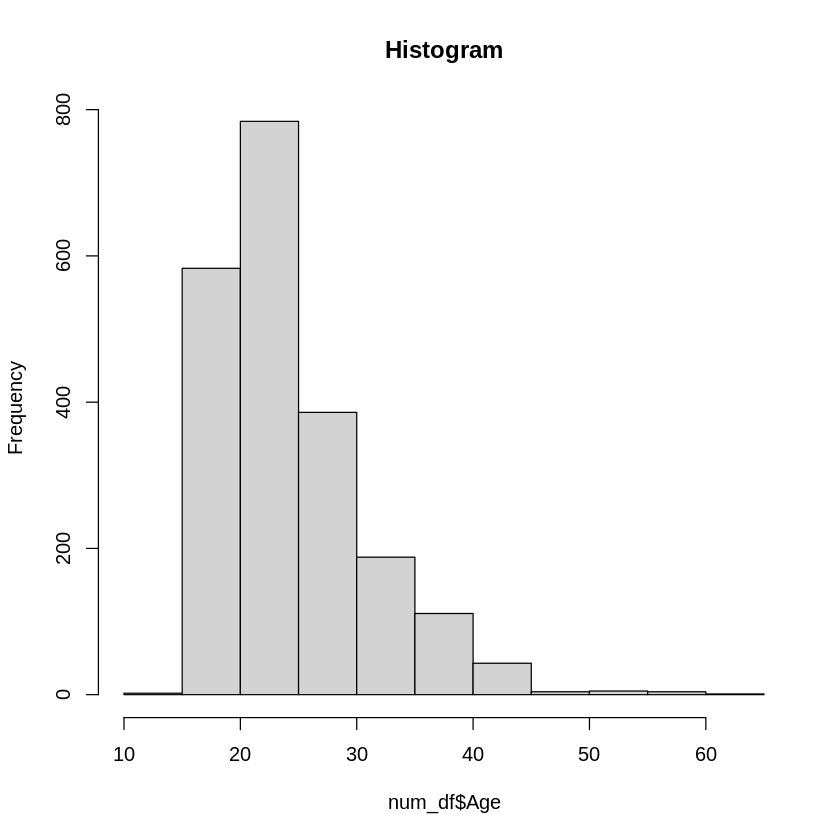

In [10]:
# Draw a histrogram for Age Variable
hist(num_df$Age, main="Histogram")

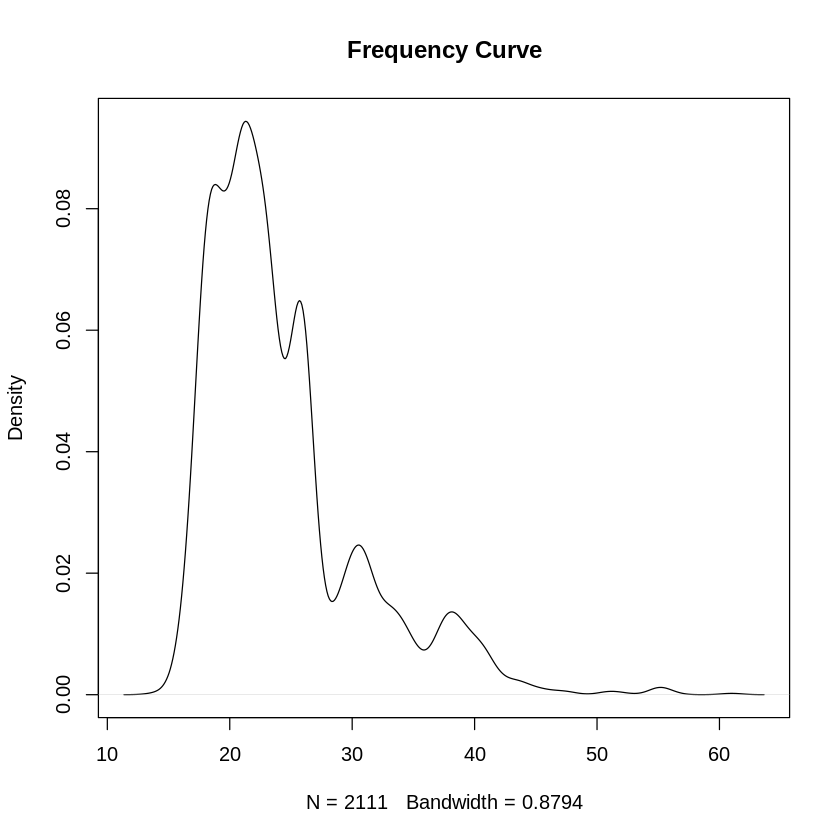

In [11]:
# Draw a Frequency Curve for Age Numerical variable
plot(density(num_df$Age), main='Frequency Curve')

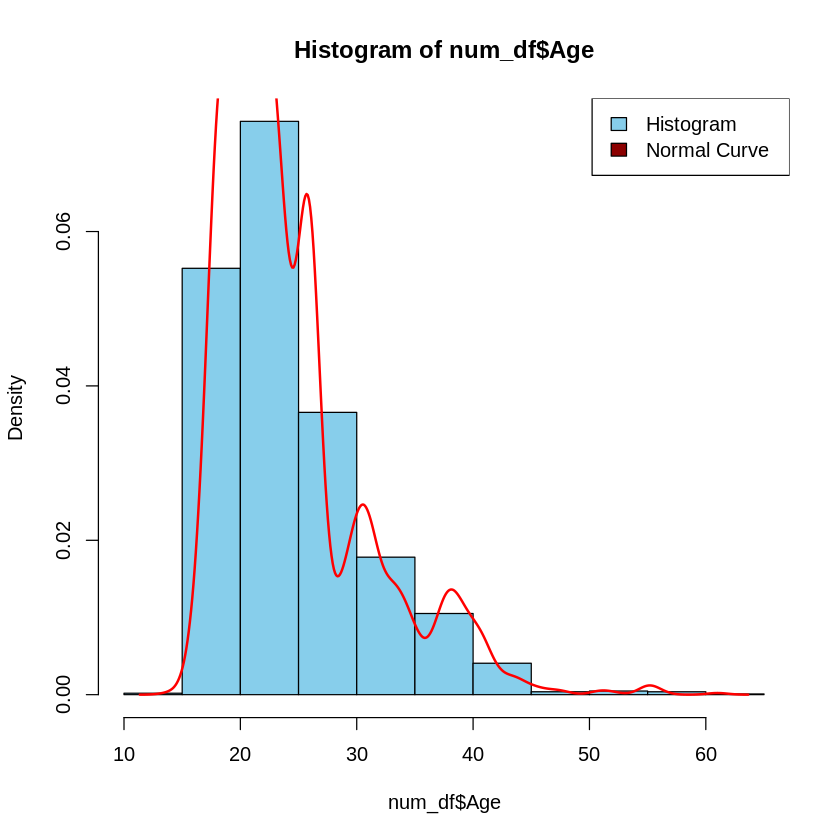

In [12]:
# Histogram with normal probability curve
hist(num_df$Age, probability = TRUE, col="skyblue")

# Add a normal probability curve
lines(density(num_df$Age), col="red", lwd=2)

# Add a legend
legend("topright", legend = c("Histogram", "Normal Curve"), fill=c("skyblue", "darkred"))

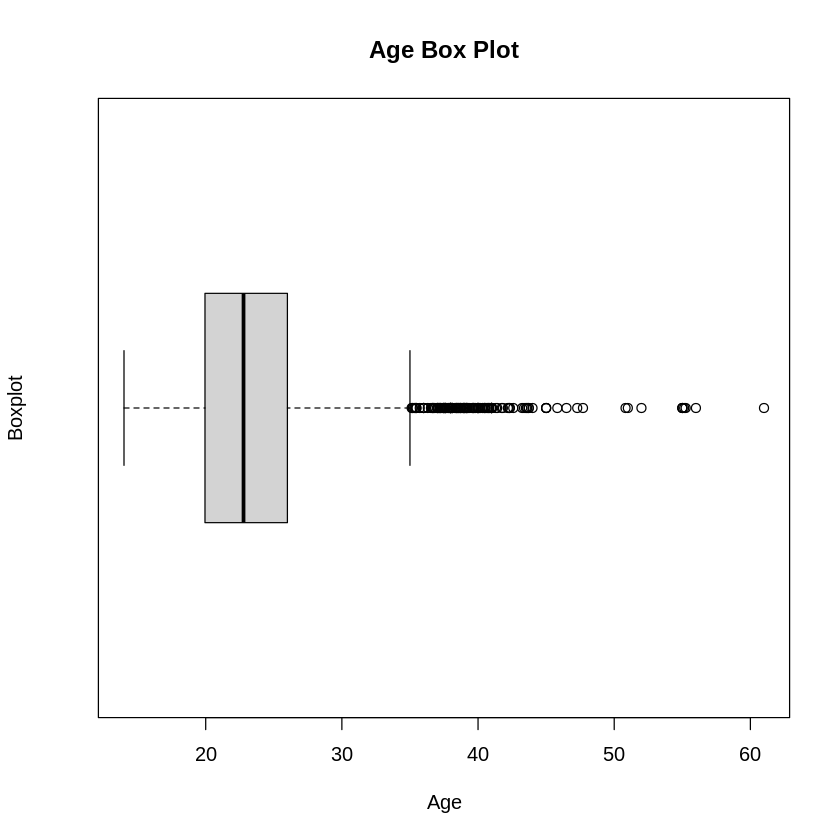

In [13]:
# Box Plot
boxplot(num_df$Age, horizontal = TRUE, main="Age Box Plot", xlab="Age", ylab="Boxplot")

In [14]:
# Stem and leaf plot for Age Numerical Variable
stem(num_df$Age)


  The decimal point is at the |

  14 | 00
  16 | 00000000011222333445668999990000000000000000000000000000000000011111+27
  18 | 00000000000000000000000000000000000000000000000000000000000000000000+340
  20 | 00000000000000000000000000000000000000000000000000000000001111112222+321
  22 | 00000000000000000000000000000000000000000000000000000000001111111222+257
  24 | 00000000000000000000000000000011111111122222222233333334444444555555+126
  26 | 00000000000000000000000000000000000000000000000000000000000000000000+127
  28 | 0002344444456778888880000000000000012223444455566677777778899999
  30 | 00000000000000011222233344444445555666666666666666777777778899990000+33
  32 | 000023334556678899000000000000000001112222233367777789
  34 | 00000001122222233444456688800000122344557
  36 | 00003567778800011122223445555556666668899
  38 | 000000000001111134444555567777899900001111222346667788
  40 | 0000000123455567788800000000003478
  42 | 223362456677
  44 | 00008
  46 | 537
  48 | 
  50 | 80


**Using For Loop:**


```
# Histogram with normal probability curve
for (i in names(num_df)) {
  hist(num_df[[i]], main = paste("Histogram with Normal Curve of", i), xlab = i, col = "lightblue", prob = TRUE)
  lines(density(num[[i]]), col = "black")
}
```



# 6. Selecting Summary Measures and Graphs for Variable
- Explain which summary measures and graphs are appropriate to present each individual variable and why. <br/> [Hints: test normality for each of the numerical variables. If it follows
normal distribution, present it using mean, standard deviation/variance, coefficient of
variation, histogram, etc. and it does not follow normal distribution, present it using
median, interquartile range, coefficient of quartile deviation, box plot, etc.]

### Noramlity test using Shapiro Wilk Method

In [15]:
count = 0;

for (i in num_df){
  shapiro_result <- shapiro.test(i)

  count <- count + 1;
  cat("P-Value for", names(num_df)[count], "is:", shapiro_result$p.value, "\n")

  if(shapiro_result$p.value > 0.05){
    print("Fail to reject the Null Hypothesis. The data is normally distributed.")
  } else {
    print("Reject the Null Hypothesis. The data is not normally distributed.")
  }

}

P-Value for Age is: 3.518278e-39 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for Height is: 2.771742e-08 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for Weight is: 3.770147e-18 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for FCVC is: 2.435506e-41 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for NCP is: 2.273978e-49 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for CH2O is: 1.116073e-29 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for FAF is: 7.714519e-33 
[1] "Reject the Null Hypothesis. The data is not normally distributed."
P-Value for TUE is: 7.391898e-37 
[1] "Reject the Null Hypothesis. The data is not normally distributed."


**Conclusion:** None of the numerical data follows a normal distribution.

### Present all numerical variable using median, interquartile range, coefficient of quartile deviation.





In [16]:
# All of them are not normal

non_normal <- sapply(num_df, function(x) {
  c(
    median = median(x),
    iqr = IQR(x),
    cqd = IQR(x) / (quantile(x, 0.75) +quantile(x, 0.25))
  )
})

non_normal <- as.data.frame(non_normal)
non_normal

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
median,22.777890,1.70049900,83.0000000,2.385502,3.00000000,2.0000000,1.0000000,0.62535
iqr,6.052808,0.13846400,41.9573390,1.000000,0.34126200,0.8926075,1.5421725,1.00000
cqd.75%,0.131734,0.04074311,0.2426626,0.200000,0.06030709,0.2197332,0.8609801,1.00000


# 7. Exploratory Subgroup Analysis
- Perform exploratory subgroup analysis: calculate summary statistics for each numerical variable by every categorical variable. <br/>
 For example, calculate minimum, maximum, mean, median, mode, 1st quartile, 3rd quartile, standard deviation, variance, coefficient of variation, interquartile range, coefficient of quartile deviation of age, height, weight, FCVC, CH2O, FAF, TUE separately for every level of the categorical variables such as separately for male and female, smoker and non-smoker, … so on.



Exploratory Analysis for Gender 

Variable: Age 
       min max     mean median mode   q1.25%   q3.75%       sd      var
Female  15  61 24.00191     22   26 19.62772 26.00000 6.407832 41.06030
Male    14  56 24.61602     23   18 20.00000 27.93353 6.273121 39.35204
             cv      iqr cqd.75%
Female 26.69718 6.372279       1
Male   25.48389 7.933529       1

Variable: Weight 
       min      max     mean   median mode q1.25%   q3.75%       sd      var
Female  39 165.0573 82.30236 78.00000   50     58 105.0369 29.72390 883.5105
Male    45 173.0000 90.76948 89.94547   70     75 108.4605 21.40703 458.2609
             cv      iqr cqd.75%
Female 36.11549 47.03686       1
Male   23.58395 33.46052       1


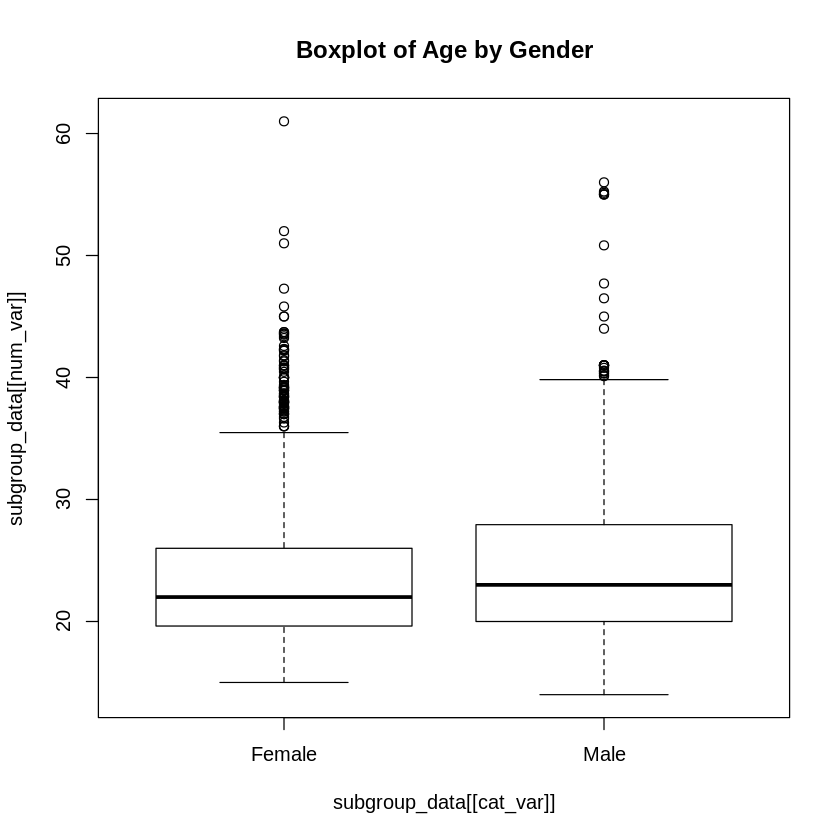



Exploratory Analysis for SMOKE 

Variable: Age 
    min max     mean   median mode   q1.25%   q3.75%       sd      var       cv
no   14  61 24.22745 22.71938   18 19.87132 26.00000 6.259133 39.17674 25.83488
yes  18  56 28.31267 26.00000   21 21.00000 31.19556 8.779344 77.07689 31.00854
          iqr cqd.75%
no   6.128681       1
yes 10.195557       1


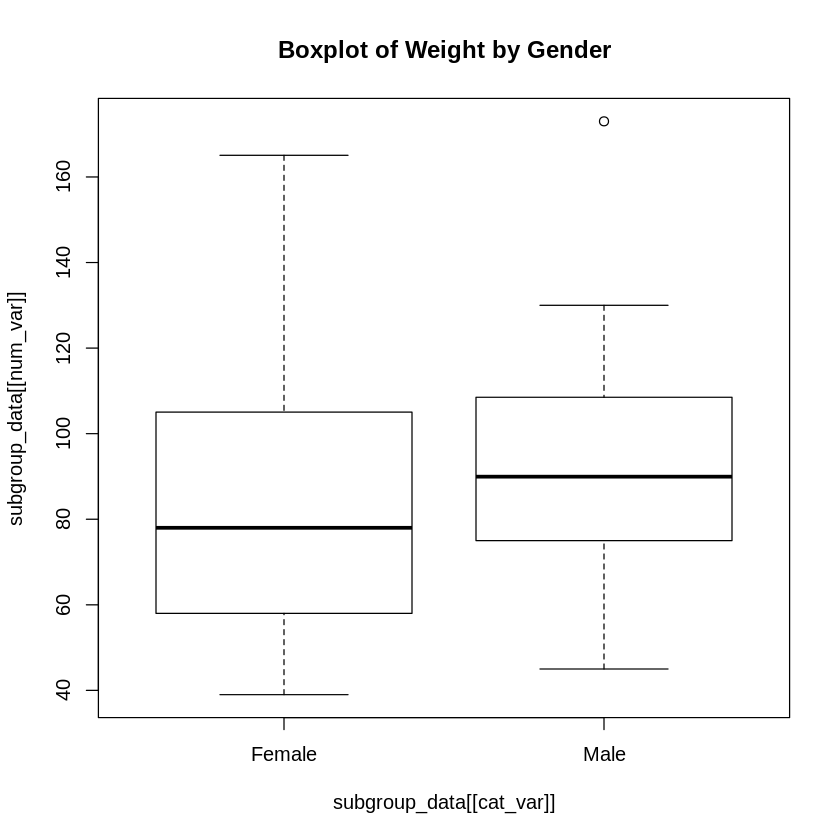


Variable: Weight 
    min max     mean median mode   q1.25%   q3.75%       sd      var       cv
no   39 173 86.48770   83.0   80 65.39394 107.0061 26.14018 683.3088 30.22415
yes  49 130 91.20681   83.5   60 66.75000 125.0677 28.42253 807.8401 31.16273
         iqr cqd.75%
no  41.61219       1
yes 58.31766       1


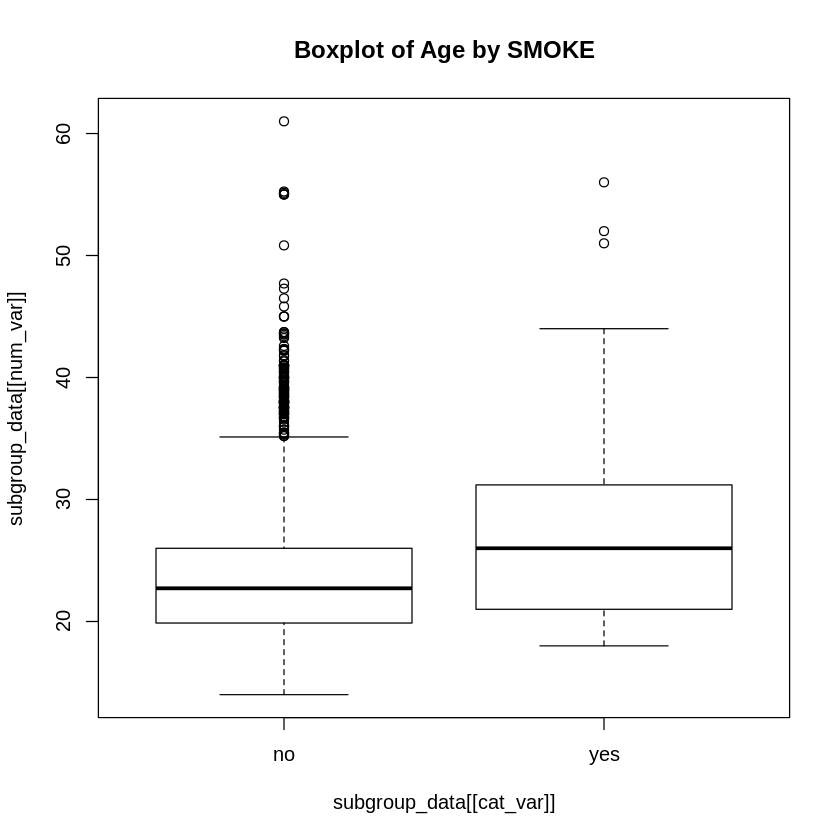

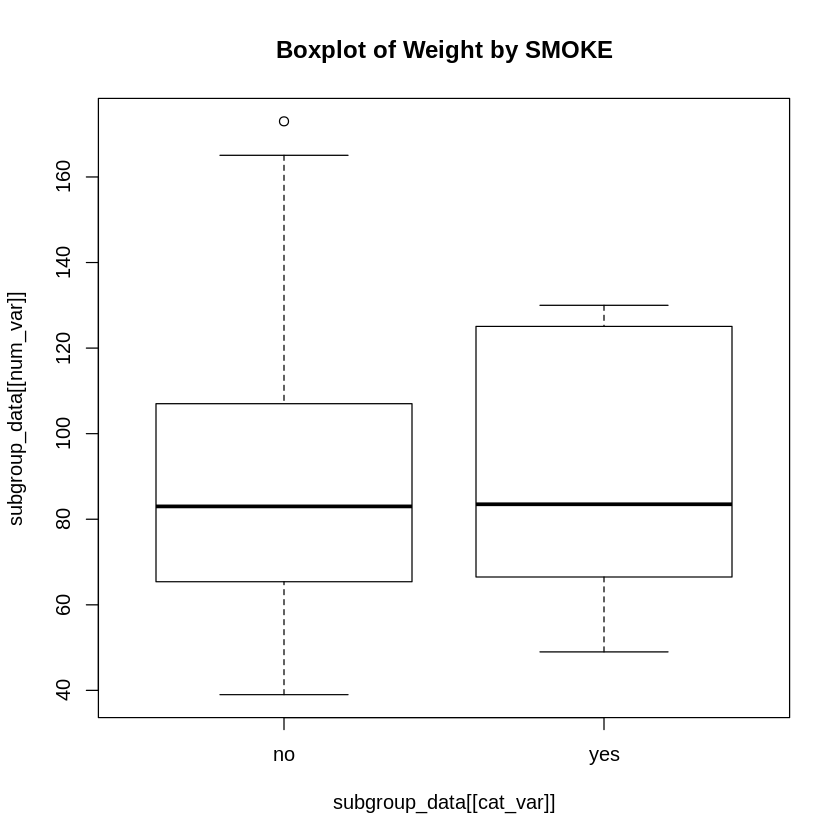

In [17]:
# Extract categorical and numerical variables
cat_data <- c("Gender", "SMOKE")
num_data <- c("Age", "Weight")


# Loop over each categorical variable
for (cat_var in cat_data){

  # Print the categorical variable name
  cat("\n\nExploratory Analysis for", cat_var, "\n")

  # Loop over each numerical variable
  for(num_var in num_data){

    # Extract data for the current subgroup
    subgroup_data <- df[, c(cat_var, num_var), drop = FALSE]

    # Print variable name
    cat("\nVariable:", num_var, "\n")

    # Calculate summary statistics
    summary_stats <- tapply(subgroup_data[[num_var]], subgroup_data[[cat_var]], function(x) {
      c(
        min = min(x, na.rm = TRUE),
        max = max(x, na.rm = TRUE),
        mean = mean(x, na.rm = TRUE),
        median = median(x, na.rm = TRUE),
        mode = as.numeric(names(sort(table(x), decreasing = TRUE)[1])),
        q1 = quantile(x, 0.25, na.rm = TRUE),
        q3 = quantile(x, 0.75, na.rm = TRUE),
        sd = sd(x, na.rm = TRUE),
        var = var(x, na.rm = TRUE),
        cv = sd(x, na.rm = TRUE) / mean(x, na.rm = TRUE) * 100,
        iqr = IQR(x, na.rm = TRUE),
        cqd = IQR(x, na.rm = TRUE) / (quantile(x, 0.75, na.rm = TRUE) - quantile(x, 0.25, na.rm = TRUE))
      )
    })

    # Convert the result to a data frame
    summary_stats_df <- as.data.frame(do.call(rbind, summary_stats))

    # Print the summary statistics
    print(summary_stats_df)

    # Create box plots for each subgroup
    boxplot(subgroup_data[[num_var]] ~ subgroup_data[[cat_var]], main = paste("Boxplot of", num_var, "by", cat_var), col = rainbow(length(levels(subgroup_data[[cat_var]]))))

  }
}

# 8. Draw Scatter Diagram
- Draw a scatter diagram between (i) age and weight, (ii) age and height and (iii) height and
weight. <br/>Draw respective regression lines on the atterplots. Also, draw scatterplot matrix of all the numerical variables. Comment on your results.

### Scatter Plot with regression line.

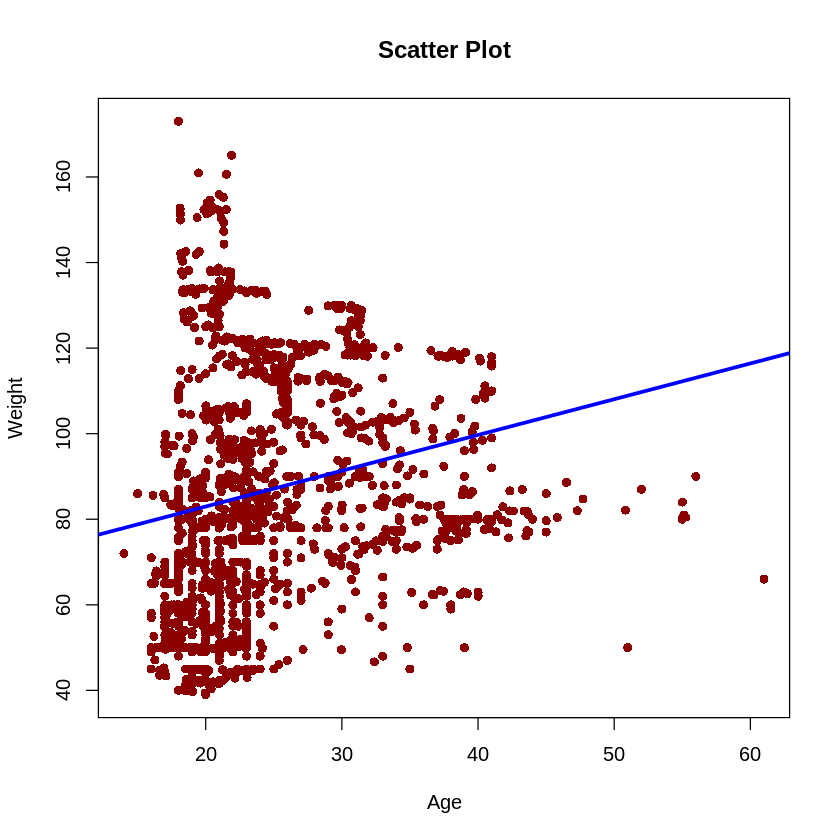

In [18]:
# (i) Draw a scatter plot between age and weight and regression line

plot(df$Age, df$Weight, main="Scatter Plot", xlab="Age", ylab = "Weight", col="darkred", pch = 16)
reg_age_weight <- lm(Weight ~ Age, data = df)
abline(reg_age_weight, col = "blue", lw=3)

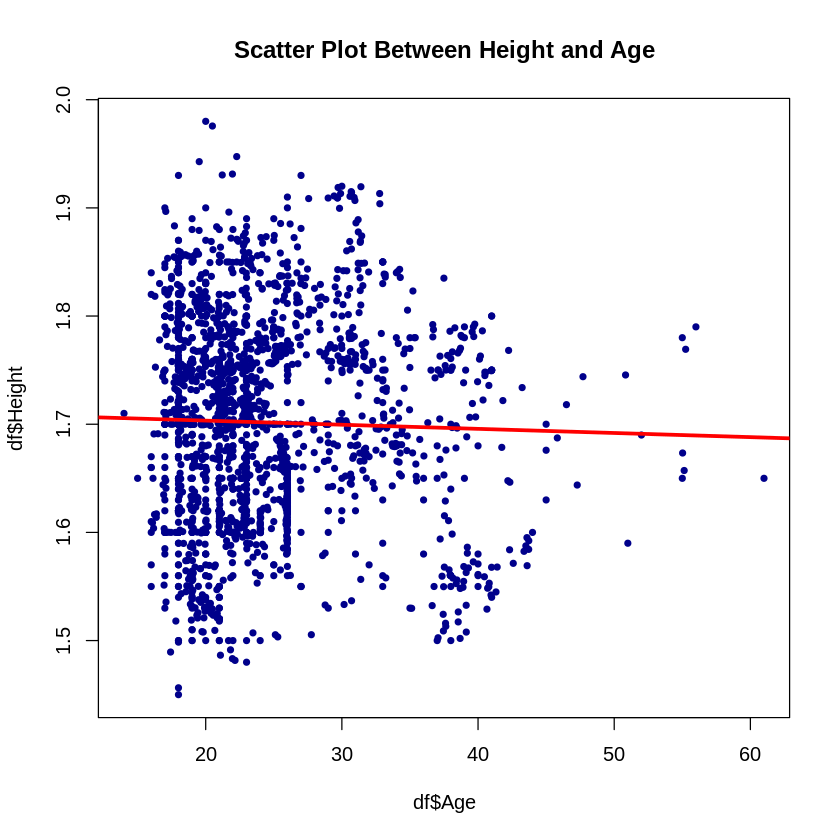

In [19]:
# (ii) Draw a scatter plot between age and height with regression line

plot(df$Age, df$Height, main="Scatter Plot Between Height and Age", col = "darkblue", pch=20)
reg_age_height <- lm(Height ~ Age, data = df)
abline(reg_age_height, col="red", lw=3)

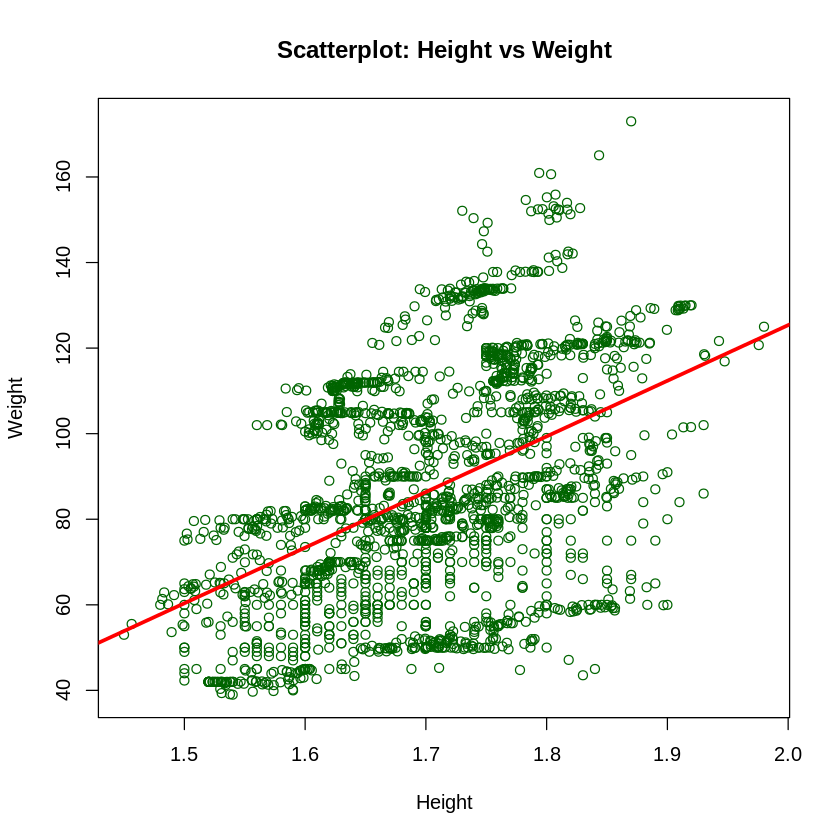

In [20]:
# Scatter diagram and regression line for Height and Weight
plot(df$Height, df$Weight, main = "Scatterplot: Height vs Weight", xlab = "Height", ylab = "Weight", col="darkgreen")
abline(lm(Weight ~ Height, data = df), col = "red", lwd=3)

### Scatter Plot Matrix
- To use scatter plot matrix first need to install psych library then use paris.panels()

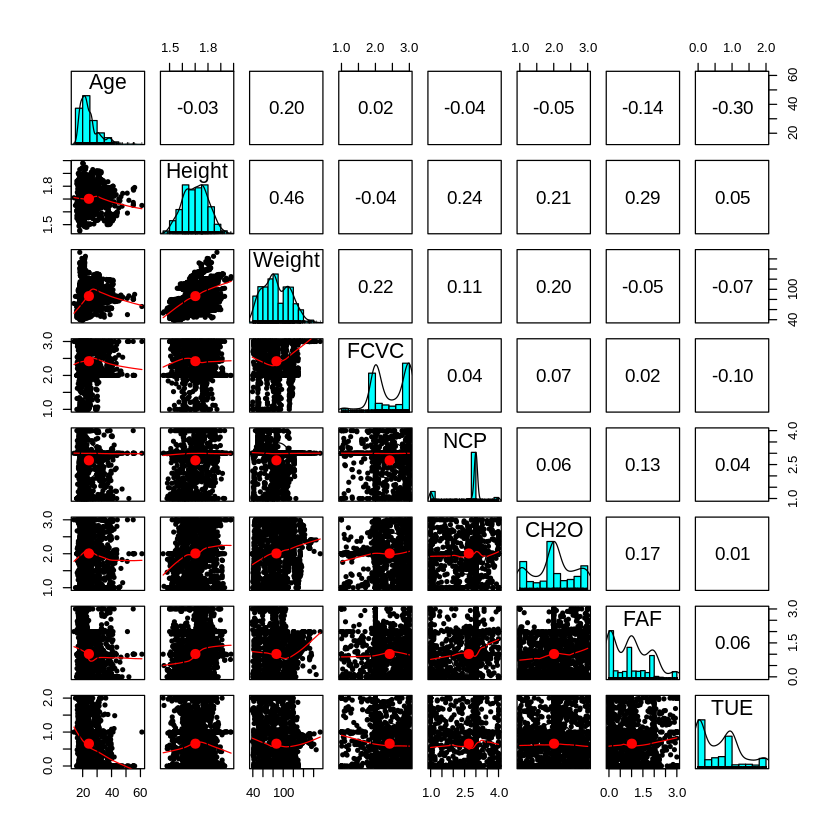

In [21]:
if (!requireNamespace("psych", quietly = TRUE)) {
  install.packages("psych")
}
library(psych)

pairs.panels(num_df)

**Comment:** <br/>
1. Correlation between Weight and Height: The scatter matrix indicates there is a correlation between Weight and Height, with a correlation coefficient of 0.46. This positive correlation suggests that as Height increases, there tends to be an associated increase in Weight.

2. Correlation Across All Numerical Variables Upon further examination of the scatter matrix, it becomes evident that there is no significant correlation among all the numerical variables. The absence of clear patterns in the scatter plots suggests a lack of linear relationships between the variables.

# 9. Recode the varialbe MTRANS and FCVC
- Recode the variable MTRANS into MTRANS_RC in which both the ‘Walking’ and ‘Bike’ categories will be ‘Ownself’ and all other categories will be ‘Car’. Also, convert the variable FCVC to a factor (name as FCVC_factor) by labeling 1 as ‘Never’, 2 as ‘Sometimes’ and 3 as ‘Always’.


In [22]:
# Recode the the Variable MTRANS

df$MTRANS_RC[df$MTRANS == "Walking" | df$MTRANS == "Bike"] = "Ownself"
df$MTRANS_RC[!(df$MTRANS == "Walking" | df$MTRANS == "Bike")] = "Car"
unique(df$MTRANS_RC)

[1] "Car"     "Ownself"

In [23]:
# Convert FCVC to a factor with labeled levels

df$FCVC <- round(df$FCVC) # Round this number
df$FCVC_factor <- factor(df$FCVC, levels = c(1, 2, 3), labels = c("Never", "Sometimes", "Always"))
unique(df$FCVC_factor )

[1] Sometimes Always    Never    
Levels: Never Sometimes Always

In [24]:
head(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,MTRANS_RC,FCVC_factor
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Car,Sometimes
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Car,Always
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Car,Sometimes
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Ownself,Always
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Car,Sometimes
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Car,Sometimes


# 10. Calculate BMI and also create a BMI Factorial Value.
- Calculate body mass index (BMI) by using the formula, $BMI = \frac{Weight}{Height^2}$. <br/>
Make a categorical variable (name as BMI_cat) using the following categorization of BMI values: Less than 18.5 as ‘Underweight’; 18.5 to 24.9 as ‘Normal’; 25.0 to 29.9 as ‘Overweight’; Greater than 30 as ‘Obesity’.

In [25]:
# Calculate BMI
df$BMI <- round(df$Weight / df$Height^2, 3)
head(df$BMI)
is.numeric(df$BMI)

[1] 24.387 24.238 23.765 26.852 28.342 20.195

[1] TRUE

In [26]:
# Create BMI_cat variable.

df$BMI_cat[df$BMI < 18.5] = "Underweight"
df$BMI_cat[df$BMI >= 18.5 & df$BMI < 25.0] = "Normal"
df$BMI_cat[df$BMI >= 25.0 & df$BMI < 30.0] = "Overweight"
df$BMI_cat[df$BMI >= 30.0] = "Obesity"

unique(df$BMI_cat)

[1] "Normal"      "Overweight"  "Obesity"     "Underweight"

In [27]:
head(df[ , c("Weight", "Height", "BMI", "BMI_cat")])

,Weight,Height,BMI,BMI_cat
,<dbl>,<dbl>,<dbl>,<chr>
1,64.0,1.62,24.387,Normal
2,56.0,1.52,24.238,Normal
3,77.0,1.80,23.765,Normal
4,87.0,1.80,26.852,Overweight
5,89.8,1.78,28.342,Overweight
6,53.0,1.62,20.195,Normal


# 11. Calculate BMI for Specific Conditions.
- Calculate BMI for respondents (i) whose age > 30 years, <br/> (ii) who is non-smoker, have physical activity of 2 days and drinks more than 1 liter of water daily.

In [28]:
# Calculate BMI Whose age > 30 years

df_age_gt30 <- df[df$Age > 30 ,]
head(df_age_gt30)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,MTRANS_RC,FCVC_factor,BMI,BMI_cat
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
14,Male,41,1.80,99,no,yes,2,3,Sometimes,no,2,no,2,1,Frequently,Automobile,Car,Sometimes,30.556,Obesity
22,Female,52,1.69,87,yes,yes,3,1,Sometimes,yes,2,no,0,0,no,Automobile,Car,Always,30.461,Obesity
32,Female,31,1.58,68,yes,no,2,1,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Car,Sometimes,27.239,Overweight
34,Male,39,1.79,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Car,Sometimes,28.089,Overweight
93,Male,55,1.78,84,yes,no,3,4,Frequently,no,3,yes,3,0,Frequently,Walking,Ownself,Always,26.512,Overweight
105,Female,38,1.56,80,yes,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Car,Sometimes,32.873,Obesity


In [29]:
# Calculate BMI who is non-smoker, have physical activity of 2 days and drinks more than 1 liter of water daily.

filter <- (df$SMOKE == 'no') & (df$FAF == 2) & (df$CH2O > 1)
filter_df <- df[filter , ]
head(filter_df)
dim(filter_df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,MTRANS_RC,FCVC_factor,BMI,BMI_cat
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
3,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Car,Sometimes,23.765,Normal
4,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Ownself,Always,26.852,Overweight
11,Male,26,1.85,105,yes,yes,3,3,Frequently,no,3,no,2,2,Sometimes,Public_Transportation,Car,Always,30.679,Obesity
12,Female,21,1.72,80,yes,yes,2,3,Frequently,no,2,yes,2,1,Sometimes,Public_Transportation,Car,Sometimes,27.042,Overweight
13,Male,22,1.65,56,no,no,3,3,Sometimes,no,3,no,2,0,Sometimes,Public_Transportation,Car,Always,20.569,Normal
14,Male,41,1.80,99,no,yes,2,3,Sometimes,no,2,no,2,1,Frequently,Automobile,Car,Sometimes,30.556,Obesity


[1] 148  20

# 12. Create a new Obesity_sub data set.
- Create a new dataset (name as: obesity_sub) by taking the respondents whose height is more than 1.8 meter and who eat high caloric food frequently. Calculate mean and standard deviation of BMI using the obesity_sub dataset.


In [30]:
# Create a new dataset

filter <- (df$Height > 1.8) & (df$FAVC == "yes")
Obesity_sub <- df[filter , ]
head(Obesity_sub)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,MTRANS_RC,FCVC_factor,BMI,BMI_cat
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
11,Male,26,1.85,105,yes,yes,3,3,Frequently,no,3,no,2,2,Sometimes,Public_Transportation,Car,Always,30.679,Obesity
17,Male,27,1.93,102,yes,yes,2,1,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Car,Sometimes,27.383,Overweight
25,Male,21,1.85,68,yes,yes,2,3,Sometimes,no,2,no,0,1,Sometimes,Public_Transportation,Car,Sometimes,19.869,Normal
47,Male,21,1.82,72,yes,yes,1,3,Frequently,no,3,no,2,0,Sometimes,Public_Transportation,Car,Never,21.737,Normal
87,Male,21,1.85,83,yes,yes,2,1,Frequently,no,3,no,1,0,no,Public_Transportation,Car,Sometimes,24.251,Normal
88,Male,19,1.82,87,yes,yes,2,3,Sometimes,no,2,no,0,0,no,Public_Transportation,Car,Sometimes,26.265,Overweight


In [31]:
# Calculate mean and standard deviation of BMI using the obesity_sub dataset.

mean_value <- mean(Obesity_sub$BMI, na.rm = TRUE)
sd_value <- sd(Obesity_sub$BMI, na.rm=TRUE)

cat("Obesity Dataset Mean:", mean_value, "\n")
cat("Obesity Dataset Standard Deviation:", sd_value, "\n")

Obesity Dataset Mean: 30.44498 
Obesity Dataset Standard Deviation: 7.630543 


# 13. Calculate Correlation
- Calculate correlation between (i) age and weight, (ii) age and height and (iii) height and weight. Compare and contrast these results with the results of the task number 8.


In [32]:
# (i) Calculate Correlation between age and weight
cor(df$Age, df$Weight)

[1] 0.2025601

In [33]:
# (ii) Calculate Correlation between age and height
cor(df$Age, df$Height)

[1] -0.02595813

In [34]:
# (iii) Calculate Correlation between height and weight
cor(df$Height, df$Weight)

[1] 0.4631361

# 14. Correlation between Age and BMI
- Calculate correlation between age and BMI and comment on the relationship. Does this
correlation significantly differ from zero? Calculate correlation matrix of all the numerical
variables. Comment on your results.

In [35]:
# Correlation between age and BMI
cor(Obesity_sub$Age, Obesity_sub$BMI)

[1] 0.2197682

Test the correlation significantly differ from zero: <br/>
$N_0$ (Null Hypothesis): There is no correlation between age and BMI (correlation = 0). <br/>
$N_a$ (Alternative Hypothesis): There is a correlation between age and BMI (correlation ≠ 0)

In [36]:
# Test whether the correlation is significantly different from zero
cor_test_result <- cor.test(Obesity_sub$Age, Obesity_sub$BMI)
cor_test_result


	Pearson's product-moment correlation

data:  Obesity_sub$Age and Obesity_sub$BMI
t = 3.8758, df = 296, p-value = 0.0001309
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1088658 0.3252669
sample estimates:
      cor 
0.2197682 


**Conclusion:** Here p-value < 0.05.
Reject the Null Hypothesis and concluded that there is a correlation between Age and BMI.

In [37]:
# Calculate correlation matrix between numerical variables
cor(num_df)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.00000000,-0.02595813,0.20256010,0.01629089,-0.04394373,-0.04530386,-0.14493833,-0.29693059
Height,-0.02595813,1.00000000,0.46313612,-0.03812106,0.24367173,0.21337592,0.29470900,0.05191167
Weight,0.20256010,0.46313612,1.00000000,0.21612471,0.10746899,0.20057539,-0.05143627,-0.07156136
FCVC,0.01629089,-0.03812106,0.21612471,1.00000000,0.04221630,0.06846147,0.01993940,-0.10113485
NCP,-0.04394373,0.24367173,0.10746899,0.04221630,1.00000000,0.05708800,0.12950431,0.03632557
CH2O,-0.04530386,0.21337592,0.20057539,0.06846147,0.05708800,1.00000000,0.16723649,0.01196534
FAF,-0.14493833,0.29470900,-0.05143627,0.01993940,0.12950431,0.16723649,1.00000000,0.05856207
TUE,-0.29693059,0.05191167,-0.07156136,-0.10113485,0.03632557,0.01196534,0.05856207,1.00000000


**Conclusion:**
- Weight and Height exhibit a moderate positive correlation, aligning with expectations.
- Age and Weight show a modest positive correlation, suggesting a slight tendency for weight to increase with age.
- Height is moderately positively correlated with the number of main meals, indicating a potential association.
- Frequency of vegetable consumption (FCVC) is weakly correlated with various factors, while the correlation between FCVC and water consumption is slight.
- Age correlates negatively with time spent on entertainment, aligning with the expectation that older individuals may spend less time in such activities.
- Physical activity frequency (FAF) correlates moderately with height and weakly with water consumption.

# 15.  Hypothesis Testing for Selected Characteristics of Survey Respondents.
- Using appropriate method, test whether the respondent’s: <br/> (i) average age is equal to 30 years, <br/> (ii) average height is greater than to 1.7 meters, <br/>(iii) average consumption of water daily (CH2O) is equal to 2 liters and <br/>(iv) average BMI is less than 30.  <br/>
[Hints on appropriate method: among parametric and non-parametric tests, which is applicable in each individual question? If parametric, then z-test or t-test? Why?]

In [38]:
# (i) average age is equal to 30 years
shapiro.test(df$Age)
wilcox.test(df$Age, mu=30)

# Null Hypothesis (H0): Average age is equal to 30 years (μ = 30).
# Alternative Hypothesis (H1): Average age is not equal to 30 years (μ ≠ 30).


	Shapiro-Wilk normality test

data:  df$Age
W = 0.86606, p-value < 2.2e-16



	Wilcoxon signed rank test with continuity correction

data:  df$Age
V = 258768, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 30


In [39]:
# (ii) Average height is greater than to 1.7 meters
wilcox.test(df$Height, mu=1.7, alternative = "greater")

# Null Hypothesis (H0): Average height is equal to or less than 1.7 meters (μ ≤ 1.7).
# Alternative Hypothesis (H1): Average height is greater than 1.7 meters (μ > 1.7).


	Wilcoxon signed rank test with continuity correction

data:  df$Height
V = 1075418, p-value = 0.193
alternative hypothesis: true location is greater than 1.7


In [40]:
# (iii) average consumption of water daily (CH2O) is equal to 2 liters
wilcox.test(df$CH2O, mu=2)

# Null Hypothesis (H0): Average CH2O is equal to 2 liters (μ = 2).
# Alternative Hypothesis (H1): Average CH2O is not equal to 2 liters (μ ≠ 2).


	Wilcoxon signed rank test with continuity correction

data:  df$CH2O
V = 700548, p-value = 0.655
alternative hypothesis: true location is not equal to 2


In [41]:
# (iv) Average BMI is Less than 30
wilcox.test(df$BMI, mu = 30, alternative = "less")

# Null Hypothesis (H0): Average BMI is equal to or greater than 30 (μ ≥ 30).
# Alternative Hypothesis (H1): Average BMI is less than 30 (μ < 30).


	Wilcoxon signed rank test with continuity correction

data:  df$BMI
V = 1053296, p-value = 0.0143
alternative hypothesis: true location is less than 30


**Comment: Here all of the numerical variables are non parametric. That's Why we need to use Wilcox Test**

### Description

#### Parametric Tests:

1. **Use Parametric Tests When:**
   - The data is approximately normally distributed.
   - The assumptions of the parametric test are met.

2. **Choosing Between Z-Test and T-Test:**
   - **Use Z-Test When:**
     - You know the population standard deviation (σ).
     - The sample size is sufficiently large (typically n > 30).

   - **Use T-Test When:**
     - The population standard deviation is unknown.
     - The sample size is small (typically n ≤ 30).
     - The data is not normally distributed.

#### Non-Parametric Tests:

1. **Use Non-Parametric Tests When:**
   - The data is not normally distributed.
   - The assumptions of parametric tests cannot be met.

2. **Common Non-Parametric Tests:**
   - Mann-Whitney U test (alternative to the independent samples t-test).
   - Wilcoxon signed-rank test (alternative to the paired samples t-test).
   - Kruskal-Wallis test (alternative to one-way ANOVA).

### Specific Scenarios:

1. **Large Sample, Known Standard Deviation:**
   - If the sample size is large (n > 30) and the population standard deviation is known, use a Z-Test.

2. **Small Sample or Unknown Standard Deviation:**
   - If the sample size is small (n ≤ 30) or the population standard deviation is unknown, use a T-Test.

3. **Non-Normal Data or Ordinal Data:**
   - If the data is not normally distributed or if dealing with ordinal data, consider using non-parametric tests (e.g., Mann-Whitney U test, Wilcoxon signed-rank test).


#### For Parametric Value we use t-test like:


```
# One-sample t-test for average age
t_test_age <- t.test(df$Age, mu = 30)
t_test_age
```



# 16. Comparative Analysis of Demographic and Health Characteristics Among Survey Respondents.
- Using appropriate method, test whether the average age, height and BMI of the respondents significantly differ between: <br/> (i) male and female, and <br/> (ii) smoker and non-smoker. <br/> (iii) Test whether the BMI value is higher for the respondents with family history of overweight and lower for those who monitor their calorie consumption. <br/>[Hints on appropriate method: among parametric and non-parametric tests, which is applicable in each individual question? If parametric, then z-test or t-test? Why?]

#### (i) Test whether the average age, height and BMI of the respondents significantly differ between male and female

In [42]:
# Test the average Age
wilcox.test(Age ~ Gender, data = df)

# Null Hypothesis (H0): There is no difference in average age/height/BMI between male and female.
# Alternative Hypothesis (H1): There is a difference in average age/height/BMI between male and female.


	Wilcoxon rank sum test with continuity correction

data:  Age by Gender
W = 513089, p-value = 0.001723
alternative hypothesis: true location shift is not equal to 0


**Conclusion:**
The p-value is less than the conventional significance level of 0.05, indicating that there is strong evidence against the null hypothesis. Therefore, based on the Wilcoxon rank-sum test, we can conclude that there is a significant difference in age between male and female respondents. The alternative hypothesis suggests that the true location shift (median difference) is not equal to 0, and the data provides strong support for this claim.

In summary, there is a significant difference in age between males and females based on the Wilcoxon rank-sum test with continuity correction.

In [43]:
# Test the average Height
wilcox.test(Height ~ Gender , data = df)


	Wilcoxon rank sum test with continuity correction

data:  Height by Gender
W = 153180, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


**Conclusion:**
The p-value is extremely small (less than 2.2e-16), providing strong evidence against the null hypothesis. Therefore, based on the Wilcoxon rank-sum test, we can conclude that there is a significant difference in height between male and female respondents. The alternative hypothesis suggests that the true location shift (median difference) is not equal to 0, and the data provides strong support for this claim.

In [44]:
# Test the average BMI
wilcox.test(BMI ~ Gender, data = df)


	Wilcoxon rank sum test with continuity correction

data:  BMI by Gender
W = 568470, p-value = 0.4112
alternative hypothesis: true location shift is not equal to 0


**Conclusion:**
The p-value is greater than the conventional significance level of 0.05, indicating that there is insufficient evidence to reject the null hypothesis. Therefore, based on the Wilcoxon rank-sum test, we do not find a significant difference in BMI between male and female respondents. The alternative hypothesis suggests that the true location shift (median difference) is not equal to 0, but the data does not provide enough evidence to support this claim.

#### (ii) Test for Age, Height, and BMI between Smoker and Non-Smoker

In [45]:
# Test for average age
wilcox.test(Age ~ SMOKE, data = df)

# Null Hypothesis (H0): There is no difference in average age/height/BMI between smokers and non-smokers.
# Alternative Hypothesis (H1): There is a difference in average age/height/BMI between smokers and non-smokers.


	Wilcoxon rank sum test with continuity correction

data:  Age by SMOKE
W = 31130, p-value = 0.0003357
alternative hypothesis: true location shift is not equal to 0


**Conclusion:** The p-value is very small, indicating strong evidence against the null hypothesis. Therefore, there is a significant difference in age between smokers and non-smokers.

In [46]:
# Test for average height
wilcox.test(Height ~ SMOKE , data=df)


	Wilcoxon rank sum test with continuity correction

data:  Height by SMOKE
W = 37178, p-value = 0.03813
alternative hypothesis: true location shift is not equal to 0


**Conclusion:** The p-value is less than the conventional significance level of 0.05, suggesting evidence against the null hypothesis. Therefore, there is a significant difference in height between smokers and non-smokers.

In [47]:
# Test for average BMI
wilcox.test(BMI ~ SMOKE, data=df)


	Wilcoxon rank sum test with continuity correction

data:  BMI by SMOKE
W = 45056, p-value = 0.9169
alternative hypothesis: true location shift is not equal to 0


**Conclusion:** The p-value is large (greater than 0.05), indicating that there is no significant difference in BMI between smokers and non-smokers.

#### (iii) Test for BMI based on Family History of Overweight and Calorie Consumption Monitoring.

In [48]:
# BMI Differences for Family History and Caloric Consumption Monitoring (considering "yes" only with SCC variable):
# Appropriate Test: Independent samples t-test or Mann-Whitney U test (non-parametric) depending on the normality of the data.

# Null Hypothesis (H0): There is no difference in average BMI for respondents with and without family history of overweight and for those who monitor and do not monitor their caloric consumption (considering only "yes" cases).
# Alternative Hypothesis (H1): There is a significant difference in average BMI.

# Filter the data for respondents with caloric consumption monitoring equal to "yes"
obes_data_yes_scc <- subset(df, SCC == "yes")
head(obes_data_yes_scc)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,MTRANS_RC,FCVC_factor,BMI,BMI_cat
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
2,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Car,Always,24.238,Normal
12,Female,21,1.72,80,yes,yes,2,3,Frequently,no,2,yes,2,1,Sometimes,Public_Transportation,Car,Sometimes,27.042,Overweight
16,Female,22,1.70,66,yes,no,3,3,Always,no,2,yes,2,1,Sometimes,Public_Transportation,Car,Always,22.837,Normal
29,Male,19,1.75,76,yes,yes,3,3,Sometimes,no,2,yes,3,1,Sometimes,Public_Transportation,Car,Always,24.816,Normal
37,Female,22,1.56,49,no,yes,2,3,Sometimes,no,1,yes,2,0,no,Walking,Ownself,Sometimes,20.135,Normal
54,Female,23,1.63,55,yes,no,3,3,no,no,2,yes,2,1,no,Public_Transportation,Car,Always,20.701,Normal


In [49]:
unique(df$family_history_with_overweight)

# Test for BMI based on Family History of Overweight
wilcox.test(BMI ~ family_history_with_overweight, data=df, alternative = "less")

[1] "yes" "no"


	Wilcoxon rank sum test with continuity correction

data:  BMI by family_history_with_overweight
W = 84698, p-value < 2.2e-16
alternative hypothesis: true location shift is less than 0


**Conclusion:**
Reject the null hypothesis. There is strong evidence to suggest that there is a statistically significant difference in BMI between individuals with a family history of overweight and those without.

#### For Parametric value we use t-test Like:


```
# Independent samples t-test for average age between male and female
t_test_age_gender <- t.test(Age ~ Gender, data = df)
t_test_age_gender
```



# 17. Analysis of Variations in Age, Height, and BMI Among Different Groups of CAEC, CALC, and MTRANS, Including Multiple Comparisons.
- Using appropriate method, test whether there are significant variations in the average age, height and BMI of the respondents among different groups of CAEC, CALC and MTRANS. Also, identify which pairs of the group means of each variable significantly differ (perform multiple comparison). <br/>
[Hints on appropriate method: among parametric and non-parametric tests, which is applicable in each individual question and why?]


In [50]:
# Overall group comparisons

# Kruskal-Wallis Test for CAEC
kruskal_age <- kruskal.test(Age ~ CAEC, data = df)
kruskal_height <- kruskal.test(Height ~ CAEC, data = df)
kruskal_bmi <- kruskal.test(BMI ~ CAEC, data = df)

In [51]:
# For CALC Value
kruskal.test(Age ~ CALC, data = df)
kruskal.test(Height ~ CALC, data = df)
kruskal.test(BMI ~ CALC, data = df)


	Kruskal-Wallis rank sum test

data:  Age by CALC
Kruskal-Wallis chi-squared = 20.683, df = 3, p-value = 0.0001225



	Kruskal-Wallis rank sum test

data:  Height by CALC
Kruskal-Wallis chi-squared = 39.114, df = 3, p-value = 1.642e-08



	Kruskal-Wallis rank sum test

data:  BMI by CALC
Kruskal-Wallis chi-squared = 98.294, df = 3, p-value < 2.2e-16


In [52]:
# For MTRANS Value
kruskal.test(Age ~ MTRANS, data = df)
kruskal.test(Height ~ MTRANS, data = df)
kruskal.test(BMI ~ MTRANS, data = df)


	Kruskal-Wallis rank sum test

data:  Age by MTRANS
Kruskal-Wallis chi-squared = 491.19, df = 4, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  Height by MTRANS
Kruskal-Wallis chi-squared = 24.094, df = 4, p-value = 7.65e-05



	Kruskal-Wallis rank sum test

data:  BMI by MTRANS
Kruskal-Wallis chi-squared = 46.479, df = 4, p-value = 1.957e-09


IF CAEC Value is Parametric We can use Anova Test:


```
# CAEC - Age ANOVA
age_anova_caec <- aov(Age ~ CAEC, data = df)
summary(age_anova_caec)

turkey_age_anova_caec <- TukeyHSD(age_anova_caec)
turkey_age_anova_caec
```



# 18. Analysis of the Association Between BMI_cat and Various Categorical Variables.
- Using appropriate method, test whether there is significant association between BMI and
(i) gender, (ii) family history with overweight, (iii) smoking, (iv) FAVC, (v) CAEC, (vi)
SCC, (vii) CALC and (viii) MTRANS. Report the contingency tables, row/column/total
percentages and table of expected cell count. <br/>
[Hints on appropriate method: among
asymptotic and exact tests, which is applicable in each individual question and why?]




In [53]:
if (!requireNamespace("gmodels", quietly = TRUE)) {
  install.packages("gmodels")
}
library(gmodels)


for (i in names(cat_df)) {
  print(paste("Crosstab of BMI_cat by", i))

  if (i == "FAVC"){
    break;
  }

  CrossTable(df$BMI_cat, df[[i]],
             prop.r = TRUE, prop.c = TRUE, prop.t = TRUE,
             prop.chisq = FALSE, fisher = FALSE, expected = TRUE)
}

[1] "Crosstab of BMI_cat by Gender"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  2111 

 
             | df[[i]] 
  df$BMI_cat |    Female |      Male | Row Total | 
-------------|-----------|-----------|-----------|
      Normal |       154 |       146 |       300 | 
             |   148.224 |   151.776 |           | 
             |     0.513 |     0.487 |     0.142 | 
             |     0.148 |     0.137 |           | 
             |     0.073 |     0.069 |           | 
-------------|-----------|-----------|-----------|
     Obesity |       482 |       492 |       974 | 
             |   481.233 |   492.767 |           | 
             |     0.495 |     0.505 |     0.461 | 
             |     0.462 |     0.461 |           | 
             |     0.228 |     0.233 |           | 
--------

# 19. Multiple Linear Regression Analysis of Weight in a Subset of the Obesity Dataset.
- Create a new dataset (give name as: obesity_small) from the obesity dataset keeping the
variables only: Gender, Age, Height, Weight, family history with overweight, FAVC,
CH20, SCC, FAF, TUE and CALC. Create another dataset (namely: obesity_new) by
dropping the variables FAF, TUE and CALC from the obesity_small dataset. <br/> Using the
obesity_new dataset, fit a multiple linear regression model of Weight on Gender, Age,
Height, family history with overweight, FAVC, CH20 and SCC. Interpret the outputs of
the model including estimates of the parameters. How much variations of Weight is
explained by the explanatory variables of your model (Multiple coefficient of
determination R2
)? <br/>Predict the weight of a 23 years old male respondent having family
history with overweight, Height = 1.77, FAVC = yes, CH20 = 1 and SCC = no.




In [54]:
# Create obesity_small dataset
obesity_small <- df[, c("Gender", "Age", "Height", "Weight", "family_history_with_overweight", "FAVC", "CH2O", "SCC", "FAF", "TUE", "CALC")]

# Create obesity_new dataset by dropping FAF, TUE, and CALC
obesity_new <- df[, c("Gender", "Age", "Height", "Weight", "family_history_with_overweight", "FAVC", "CH2O", "SCC")]

In [55]:
# Fit multiple linear regression model
model <- lm(Weight ~ Gender + Age + Height + family_history_with_overweight + FAVC + CH2O + SCC, data = obesity_new)

summary(model)


Call:
lm(formula = Weight ~ Gender + Age + Height + family_history_with_overweight + 
    FAVC + CH2O + SCC, data = obesity_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.398 -13.470  -0.041  15.244  68.079 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -172.05064   10.20741 -16.855  < 2e-16 ***
GenderMale                          -9.47279    1.10618  -8.564  < 2e-16 ***
Age                                  0.59907    0.07032   8.519  < 2e-16 ***
Height                             126.87986    6.23585  20.347  < 2e-16 ***
family_history_with_overweightyes   22.13712    1.21548  18.213  < 2e-16 ***
FAVCyes                              9.29533    1.40583   6.612 4.79e-11 ***
CH2O                                 3.48173    0.72584   4.797 1.72e-06 ***
SCCyes                              -7.73917    2.14661  -3.605 0.000319 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



#### Conclusion

The output you provided is from a multiple linear regression model, and it includes estimates for the coefficients, their standard errors, t-values, and p-values. Here's how you can interpret the key parts of the output:

###### Coefficients:
- **Intercept:** The estimated intercept is -172.05064. This is the predicted value of the response variable (df.Weight) when all predictor variables are zero.

- **df.GenderMale:** The coefficient for 'df.GenderMale' is -9.47279. This means that, holding other variables constant, being male is associated with a decrease in the response variable by approximately 9.47 units compared to being female.

- **df.Height:** The coefficient for 'df.Height' is 126.87986. This indicates that for each one-unit increase in height, the predicted weight increases by approximately 126.88 units, holding other variables constant.

- **df.Age:** The coefficient for 'df.Age' is 0.59907. This suggests that for each one-year increase in age, the predicted weight increases by approximately 0.60 units, holding other variables constant.

- **df.CH2O:** The coefficient for 'df.CH2O' is 3.48173. This means that for each additional unit of 'df.CH2O', the predicted weight increases by approximately 3.48 units, holding other variables constant.

- **df.FAVCyes:** The coefficient for 'df.FAVCyes' is 9.29533. This indicates that if 'df.FAVC' is 'yes' (indicating frequent consumption of high caloric food), the predicted weight is higher by approximately 9.30 units compared to 'no', holding other variables constant.

- **df.SCCyes:** The coefficient for 'df.SCCyes' is -7.73917. This means that if 'df.SCC' is 'yes' (indicating self-confidence in weight control), the predicted weight is lower by approximately 7.74 units compared to 'no', holding other variables constant.

- **df.family_history_with_overweightyes:** The coefficient for 'df.family_history_with_overweightyes' is 22.13712. This suggests that if there is a family history of overweight ('yes'), the predicted weight is higher by approximately 22.14 units compared to 'no', holding other variables constant.

###### Statistical Significance:
- The p-values associated with each coefficient (Pr(>|t|)) are all very small (less than 0.05), indicating that each of the predictor variables is statistically significant in predicting the response variable.

###### Model Fit:
- The Multiple R-squared value is 0.4314, indicating that the model explains 43.14% of the variability in the response variable.

- The Adjusted R-squared value is 0.4295, which adjusts the R-squared value based on the number of predictors in the model.

###### F-statistic:
- The F-statistic tests the overall significance of the model. In this case, the F-statistic is 228 with a very low p-value (< 2.2e-16), indicating that the model is statistically significant.

###### Residuals:
- The residuals (differences between observed and predicted values) have a mean close to zero and are distributed around zero, indicating that the assumptions of the model are reasonable.

In summary, the model suggests that gender, height, age, water consumption (CH2O), frequency of high caloric food consumption (FAVC), self-confidence in weight control (SCC), and family history of overweight are all significant predictors of weight. The model has a reasonable fit and explains a significant portion of the variability in weight.

### Weight Prediction

In [56]:
# R Sqared Value
multiple_r_squared <- summary(model)$r.squared
print(paste("Multiple R Squared:", multiple_r_squared))

[1] "Multiple R Squared: 0.431430029693384"


In [57]:
# Predict weight for a specific respondent
new_data <- data.frame(
  Gender = "Male",
  Age = 23,
  Height = 1.77,
  family_history_with_overweight = "yes",
  FAVC = "yes",
  CH2O = 1,
  SCC = "no"
)

predict_weight <- predict(model, newdata = new_data)
print(paste("Predict Weight:", predict_weight))

[1] "Predict Weight: 91.7466358155543"


# 20. Comprehensive Analysis of BMI Determinants: Model Building, Assessment, and Outlier Detection in the Obesity Dataset.
- (i) From the Obesity Dataset (ObesityData.csv), identify the significant factors affecting
BMI. To do this, first, perform the model building/variable selection using suitable method.
Then, present the final fitted model including estimates of the parameters, their confidence
intervals, p-values. Comment on your findings. Comment goodness of fit of the final
model/How well the model fitted with the data (F statistics with its p-value, $R^2$
, adjusted $R^2$
, And AIC Value)? Find the predicted values and the residuals. <br/>
(ii) Perform model adequacy checking (check model assumptions) and examine whether
each of the model assumptions is satisfied or not. Give justification of your answer.
Propose alternative solution if any model assumption is not satisfied. <br/>
(iii) Find if there is any outlier in the data. Also, discuss whether the outliers (if any) are
influential or not.

In [58]:
# Define a threshold for identifying influential outliers
threshold <- 4 / nrow(obesity_small)
threshold

[1] 0.001894837

In [59]:
#(i) Model Building and Summary

# Fit the linear model
model <- lm(BMI ~ . , data = df)

In [60]:
# Stepwise variable selection
final_model <- step(model)

Start:  AIC=-1335.77
BMI ~ Gender + Age + Height + Weight + family_history_with_overweight + 
    FAVC + FCVC + NCP + CAEC + SMOKE + CH2O + SCC + FAF + TUE + 
    CALC + MTRANS + MTRANS_RC + FCVC_factor + BMI_cat


Step:  AIC=-1335.77
BMI ~ Gender + Age + Height + Weight + family_history_with_overweight + 
    FAVC + FCVC + NCP + CAEC + SMOKE + CH2O + SCC + FAF + TUE + 
    CALC + MTRANS + FCVC_factor + BMI_cat


Step:  AIC=-1335.77
BMI ~ Gender + Age + Height + Weight + family_history_with_overweight + 
    FAVC + NCP + CAEC + SMOKE + CH2O + SCC + FAF + TUE + CALC + 
    MTRANS + FCVC_factor + BMI_cat

                                 Df Sum of Sq     RSS     AIC
- TUE                             1       0.0  1091.9 -1337.7
- CH2O                            1       0.3  1092.1 -1337.3
- Age                             1       0.4  1092.2 -1337.1
- Gender                          1       0.9  1092.8 -1335.9
<none>                                         1091.8 -1335.8
- MTRANS         

In [61]:
# Display final model summary
summary(final_model)


Call:
lm(formula = BMI ~ Height + Weight + family_history_with_overweight + 
    FAVC + NCP + CAEC + SMOKE + SCC + FAF + CALC + MTRANS + FCVC_factor + 
    BMI_cat, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.47076 -0.42674 -0.00736  0.39875  2.44278 

Coefficients:
                                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                        54.248633   0.833340   65.098  < 2e-16 ***
Height                            -31.083652   0.268581 -115.733  < 2e-16 ***
Weight                              0.314560   0.001825  172.331  < 2e-16 ***
family_history_with_overweightyes   0.488229   0.051124    9.550  < 2e-16 ***
FAVCyes                             0.206208   0.054076    3.813 0.000141 ***
NCP                                 0.218458   0.021822   10.011  < 2e-16 ***
CAECFrequently                     -0.349467   0.113402   -3.082 0.002085 ** 
CAECno                              0.325243   0.148152    2.195 0.028250 *  
CA

In [62]:
#(ii) Diagnostics

# Predictions and Residuals
prediction <- predict(final_model)
residuals <- resid(final_model)

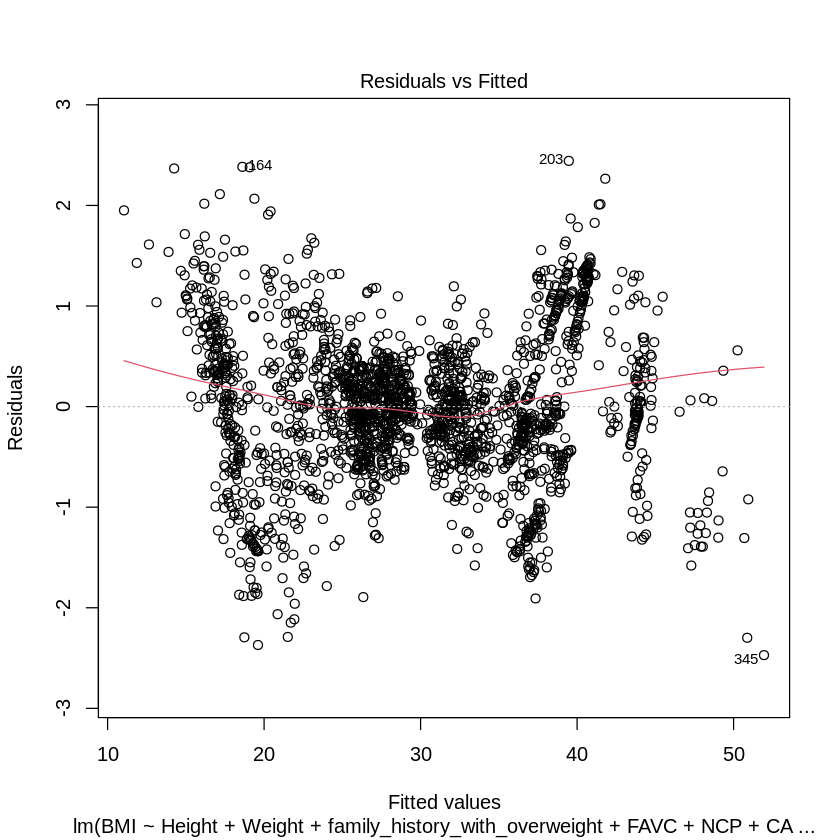


	Shapiro-Wilk normality test

data:  residuals
W = 0.99262, p-value = 7.881e-09


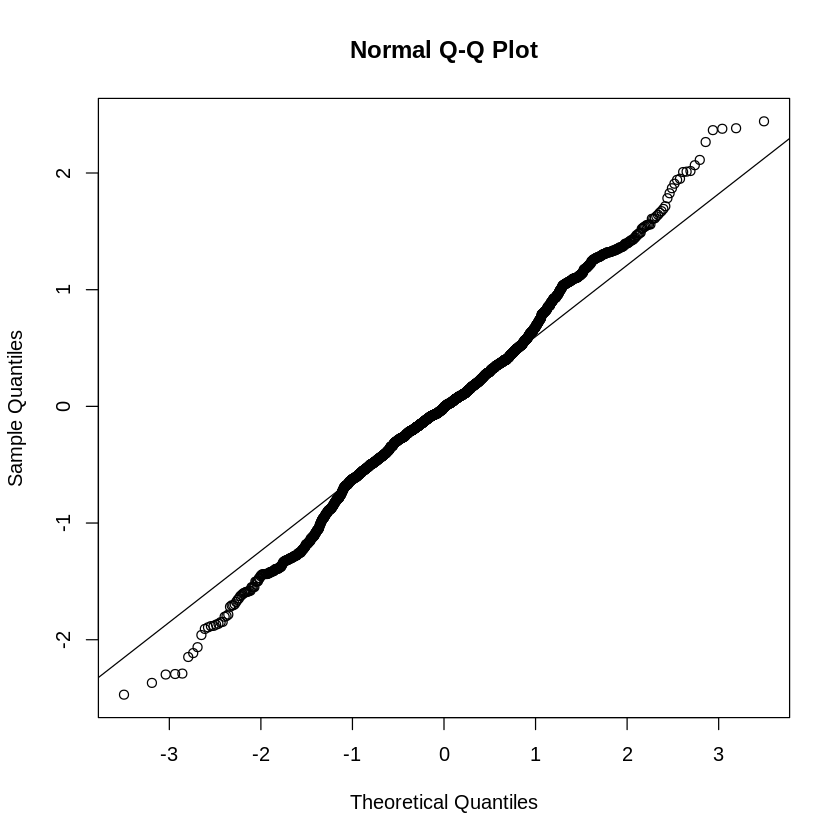

In [63]:
# Linearity Check
plot(final_model, which = 1)

# Normality Check
qqnorm(residuals)
qqline(residuals)
shapiro.test(residuals)

In [64]:
# Multicollinearity Check
if (!requireNamespace("car", quietly = TRUE)) {
  install.packages("car")
}
library(car)

vif(final_model)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit




,GVIF,Df,GVIF^(1/(2*Df))
Height,2.529257,1,1.590364
Weight,9.204959,1,3.033968
family_history_with_overweight,1.570433,1,1.253169
FAVC,1.208779,1,1.099445
NCP,1.160979,1,1.077487
CAEC,1.665943,3,1.088788
SMOKE,1.031045,1,1.015404
SCC,1.108474,1,1.052841
FAF,1.232358,1,1.110116
CALC,1.308489,3,1.045831


Warning message:
“not plotting observations with leverage one:
  27”
Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  final_model
BP = 367.7, df = 23, p-value < 2.2e-16


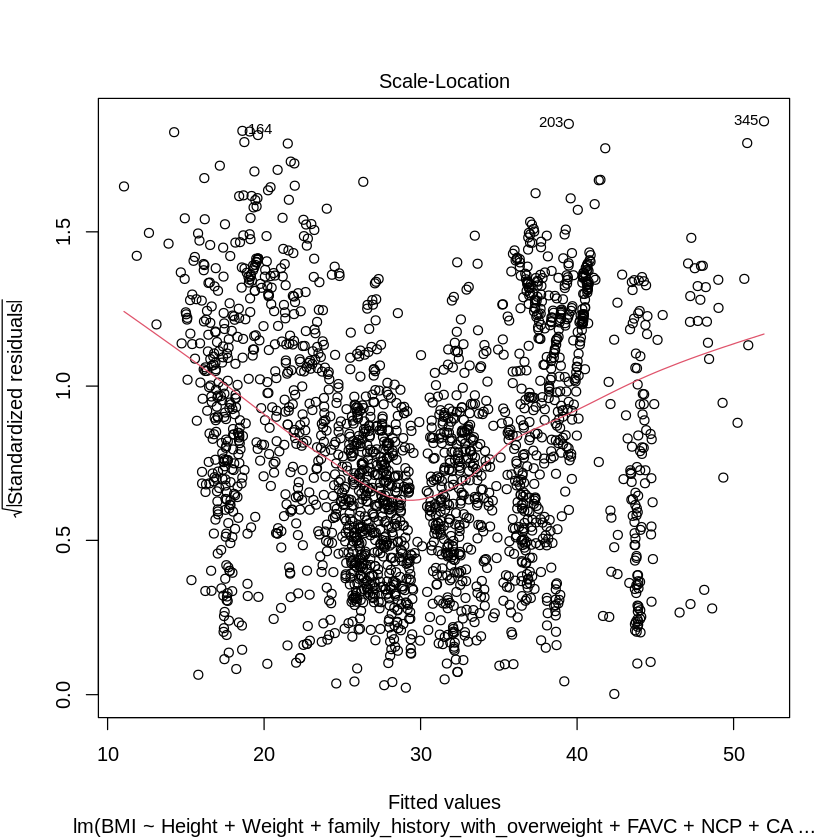

In [65]:
# Autocorrelation Check
# DurbinWatsonTest(final_model)

# Homoscedasticity Check
plot(final_model, which = 3)

if (!requireNamespace("lmtest", quietly = TRUE)) {
  install.packages("lmtest")
}
library(lmtest)

bptest(final_model)

#### iii. Find if there is any outlier in the data. Also, discuss whether the outliers (if any) are influential or not.

In [66]:
# Bonferroni Outlier Test
library(car)
outlier_test <- outlierTest(final_model)
print(outlier_test)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
345 -3.46134         0.00054831           NA


**Conclusion:** p value is less then 0.05. there is a outliers.

# 21. Comparative Analysis using Sampled Dataset.
- Draw a random sample of size n = 50 from the Obesity Dataset (ObesityData.csv) using 119 as seed number.

In [67]:
# Draw a random sample
set.seed(119)

sampled_data <- df[sample(nrow(df), 50, replace = FALSE), ]
head(sampled_data)
dim(sampled_data)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,MTRANS_RC,FCVC_factor,BMI,BMI_cat
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
1064,Female,45.00000,1.675953,79.66832,yes,yes,3,3.00000,Sometimes,no,1.000000,no,0.000000,0.000000,no,Automobile,Car,Always,28.364,Overweight
387,Female,18.00000,1.590000,53.00000,no,no,1,3.00000,Sometimes,no,1.000000,no,1.000000,2.000000,no,Public_Transportation,Car,Never,20.964,Normal
1108,Female,37.20517,1.667469,80.99337,yes,yes,2,2.77684,Sometimes,no,1.651548,no,0.000000,0.790967,no,Automobile,Car,Sometimes,29.130,Overweight
1445,Female,23.65244,1.562724,80.53570,yes,yes,2,1.00000,Sometimes,no,2.000000,no,0.389717,0.000000,no,Public_Transportation,Car,Sometimes,32.978,Obesity
1922,Female,25.91852,1.621231,104.98679,yes,yes,3,3.00000,Sometimes,no,1.653049,no,0.139159,0.711331,Sometimes,Public_Transportation,Car,Always,39.943,Obesity
596,Male,17.21093,1.819557,58.32512,yes,yes,3,4.00000,Sometimes,no,2.000000,no,2.000000,0.331483,no,Automobile,Car,Always,17.617,Underweight


[1] 50 20